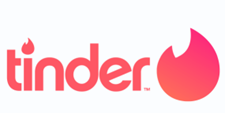

Speed Dating Data Analysis
==========================

**Client** : Tinder  
**Dates concernées** : 2002 - 2004  
**Nombre d'évènements** : 21 vagues aboutissant à 8378 rencontres  
**Nombre de participants** : 551 participants  

**Problématique** : Depuis le lancement de l'application de rencontres en 2012, Tinder fait face à une diminution du nombre de matchs et tentent de trouver un moyen de comprendre ce qui fait que les gens s'intéressent les uns aux autres. 

**Objectif** : A partir de l'analyse des données récoltées dans le cadre de speed-datings physiques et dans le but de concevoir un algorithme affiné correspondant à l'utilisateur, Identifier les facteurs qui influencent la décision d'un premier rendez-vous après le speed-dating 


## 1. Préparation de l'environnement

### Import des librairies / Dataframe et paramètres d'affichage

In [255]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import numpy as np

### Analyse de la structure du Dataset

In [256]:
df = pd.read_csv("Speed+Dating+Data.csv", encoding='cp1252')

pd.set_option('display.max_columns', None, 'display.max_rows', None)

display(df.head())

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [257]:
display(df.info( memory_usage='deep',show_counts=True,verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 195 columns):
 #    Column    Non-Null Count  Dtype  
---   ------    --------------  -----  
 0    iid       8378 non-null   int64  
 1    id        8377 non-null   float64
 2    gender    8378 non-null   int64  
 3    idg       8378 non-null   int64  
 4    condtn    8378 non-null   int64  
 5    wave      8378 non-null   int64  
 6    round     8378 non-null   int64  
 7    position  8378 non-null   int64  
 8    positin1  6532 non-null   float64
 9    order     8378 non-null   int64  
 10   partner   8378 non-null   int64  
 11   pid       8368 non-null   float64
 12   match     8378 non-null   int64  
 13   int_corr  8220 non-null   float64
 14   samerace  8378 non-null   int64  
 15   age_o     8274 non-null   float64
 16   race_o    8305 non-null   float64
 17   pf_o_att  8289 non-null   float64
 18   pf_o_sin  8289 non-null   float64
 19   pf_o_int  8289 non-null   float64
 20   pf_o_f

None

In [258]:
df.describe(include="all")

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [259]:
liste_cols = pd.DataFrame({
    'Type': df.dtypes
})

print(f"-------------------------------- \n Voici la liste des colonnes :\n-------------------------------- \n {liste_cols}")


-------------------------------- 
 Voici la liste des colonnes :
-------------------------------- 
              Type
iid         int64
id        float64
gender      int64
idg         int64
condtn      int64
wave        int64
round       int64
position    int64
positin1  float64
order       int64
partner     int64
pid       float64
match       int64
int_corr  float64
samerace    int64
age_o     float64
race_o    float64
pf_o_att  float64
pf_o_sin  float64
pf_o_int  float64
pf_o_fun  float64
pf_o_amb  float64
pf_o_sha  float64
dec_o       int64
attr_o    float64
sinc_o    float64
intel_o   float64
fun_o     float64
amb_o     float64
shar_o    float64
like_o    float64
prob_o    float64
met_o     float64
age       float64
field      object
field_cd  float64
undergra   object
mn_sat     object
tuition    object
race      float64
imprace   float64
imprelig  float64
from       object
zipcode    object
income     object
goal      float64
date      float64
go_out    float64
career     object


## 2. Nettoyage des données

### Gestion des lignes dupliquées

In [260]:
print(df.duplicated().sum())

0


### Identification et gestion des valeurs manquantes

In [261]:

missing_cols = pd.DataFrame({
    'Valeurs manquantes': df.isna().sum(),
    'Pourcentage des valeurs manquantes': round(100*df.isna().sum()/df.shape[0], 2)
})

missing_sorted_desc = missing_cols.sort_values(by='Valeurs manquantes', ascending=False)

print(f"Voici la liste des colonnes avec la quantité de valeurs manquantes et son taux: \n {missing_sorted_desc}")

Voici la liste des colonnes avec la quantité de valeurs manquantes et son taux: 
           Valeurs manquantes  Pourcentage des valeurs manquantes
num_in_3                7710                               92.03
numdat_3                6882                               82.14
expnum                  6578                               78.52
sinc7_2                 6423                               76.67
amb7_2                  6423                               76.67
shar7_2                 6404                               76.44
attr7_2                 6394                               76.32
fun7_2                  6394                               76.32
intel7_2                6394                               76.32
fun5_3                  6362                               75.94
amb5_3                  6362                               75.94
shar2_3                 6362                               75.94
attr5_3                 6362                               75.94
amb7_3  

### Attribution de valeurs textuelles pour la colonnes Gender

In [262]:
gender_map = {
    0: "Femme",
    1: "Homme"
}

In [263]:
df["gender"].isna().sum()

np.int64(0)

In [264]:
df['genre'] = df['gender'].map(gender_map)

display(df.head())

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,genre
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,Femme
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,Femme
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,Femme
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0

In [265]:
sexe = df.groupby(['gender','genre']).size().reset_index(name='Nombre')

display(sexe)

,gender,genre,Nombre
0,0,Femme,4184
1,1,Homme,4194


### Attribution de valeurs textuelles pour la colonne Carreer

In [266]:
df["career"].unique()

array(['lawyer', 'law', 'Economist', 'lawyer/policy work', 'Law',
       'Journalist', 'Congresswoman, and comedian',
       'To create early childhood intervention programs',
       'Academia, Research, Banking, Life', 'Corporate Lawyer', 'Lawyer',
       'Corporate attorney', 'research/financial industry',
       'academics or journalism', 'Financial Services', 'ceo', 'CEO',
       'Undecided', 'Informatics', 'psychologist',
       'health/nutrition oriented social worker', 'Social Worker',
       'Social work with children', 'Speech Language Pathologist', nan,
       'Social Work Administration', 'Professor', "Clidren's TV",
       'Banking', 'Capital Markets', 'Biostatistics',
       'Organizational Change Consultant', 'tech professional',
       'Engineer', 'Academic', 'academia', 'banker / academia', 'banker',
       'Music production', 'Entrepreneur',
       'Intellectual Property Attorney', 'Medicine', 'consulting',
       'LAWYER', 'social worker', 'comedienne', 'attorney',
  

In [267]:
df["career_c"].unique()

array([nan,  1.,  6.,  9.,  2.,  7., 10.,  5.,  3.,  4., 14., 11.,  8.,
       15., 12., 17., 13., 16.])

In [268]:
df["career_c"].dtype

dtype('float64')

In [269]:
print(df.loc[pd.isna(df['career_c']), ['career', 'career_c']])

                 career  career_c
0                lawyer       NaN
1                lawyer       NaN
2                lawyer       NaN
3                lawyer       NaN
4                lawyer       NaN
5                lawyer       NaN
6                lawyer       NaN
7                lawyer       NaN
8                lawyer       NaN
9                lawyer       NaN
10                  law       NaN
11                  law       NaN
12                  law       NaN
13                  law       NaN
14                  law       NaN
15                  law       NaN
16                  law       NaN
17                  law       NaN
18                  law       NaN
19                  law       NaN
20            Economist       NaN
21            Economist       NaN
22            Economist       NaN
23            Economist       NaN
24            Economist       NaN
25            Economist       NaN
26            Economist       NaN
27            Economist       NaN
28            

Certains codes métiers sont vides alors que la valeur textuelle a été renseignée ==> il faut corriger ce point

Mise en place du mapping "Carrière"

In [270]:
REGLES_METIERS = {
    1:  ("Droit/Politique publique", ['law', 'attorney', 'legal', 'counsel', 'policy']),
    2:  ("Académique/Recherche", ['professor', 'teach', 'academ', 'research', 'scientist', 'phd', 'student', 'educat']),
    3:  ("Psychologue", ['psychol', 'therapist']),
    4:  ("Médecin/Médecine", ['doctor', 'medic', 'physician', 'health', 'clinic', 'cardio', 'pediat', 'dentist', 'nutrition']),
    5:  ("Ingénieur", ['engin', 'tech', 'software', 'program', 'web']),
    6:  ("Arts créatifs/Divertissement", ['art', 'music', 'film', 'act', 'entertain', 'creat', 'medi', 'produc', 'theat', 'comedi']),
    7:  ("Commerce/Finance/Administration", ['bank', 'consult', 'financ', 'market', 'business', 'ceo', 'manag', 'admin', 'entrepre', 'trad', 'sales', 'mba', 'account', 'economist']),
    8:  ("Immobilier", ['real estate']),
    9:  ("International/Humanitaire", ['international', 'humanitarian', 'develop', 'un ', 'ngo']),
    10: ("Indécis(e)", ['undecided', 'sure', 'know', '?', 'tba', 'idea']),
    11: ("Travail social", ['social']),
    12: ("Orthophonie", ['speech']),
    13: ("Politique", ['politic', 'gov', 'public serv', 'diplomat', 'lobby']),
    14: ("Sports professionnels/Athlétisme", ['sport', 'athlet', 'ball', 'box']),
    15: ("Autre", []),
    16: ("Journalisme", ['journalis', 'editor', 'writ', 'report']),
    17: ("Architecture", ['architect']),
}


career_map = {code: info[0] for code, info in REGLES_METIERS.items()}
career_map[0] = "Non renseigné" 

def trouver_code_metier(texte):
    if not isinstance(texte, str): return 0
    texte = texte.lower()
    
    for code, (nom, keywords) in REGLES_METIERS.items():
        if any(mot in texte for mot in keywords):
            return code
            
    return 

# ---------------- APPLICATION ----------------


df['career_c'] = df['career_c'].fillna(0)

mask_manquant = (df['career_c'] == 0)

df.loc[mask_manquant, 'career_c'] = df.loc[mask_manquant, 'career'].apply(trouver_code_metier)

df['emploi'] = df['career_c'].map(career_map).fillna("Non renseigné")

In [277]:
df_unique = df.drop_duplicates(subset=['iid'])

emploi = df_unique.groupby(['emploi']).size().reset_index(name='Nombre')

emploi = emploi.sort_values(by='Nombre', ascending=False)

print(f"Analyse basée sur {len(df_unique)} participants uniques.")
display(emploi)

Analyse basée sur 551 participants uniques.


,emploi,Nombre
0,Académique/Recherche,152
4,Commerce/Finance/Administration,145
5,Droit/Politique publique,49
2,Arts créatifs/Divertissement,46
9,International/Humanitaire,35
11,Médecin/Médecine,26
7,Indécis(e),25
15,Psychologue,17
8,Ingénieur,15
17,Travail social,14


## 3. Visualisations descriptives: par sexe, par age et par emploi

In [278]:
print(f"il y a un total de {len(df['iid'].unique())} participants")

il y a un total de 551 participants


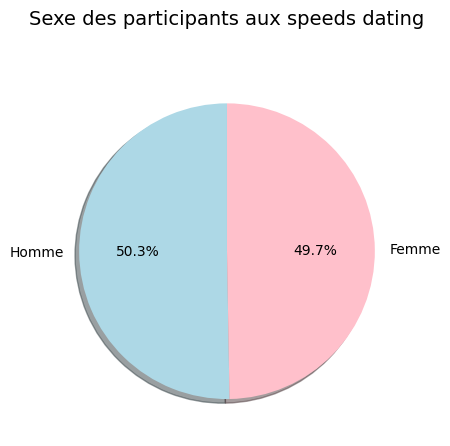

In [279]:
data_sexe = df_unique['genre'].value_counts()

plt.figure()
plt.pie(data_sexe.values, labels=data_sexe.index,
       colors = ["lightblue", "pink"],
       autopct='%1.1f%%',
       shadow=True, 
       startangle=90,
       radius=1,
       )
#plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Sexe des participants aux speeds dating", fontsize = 14, pad=30)   
                                                                                    
plt.show()

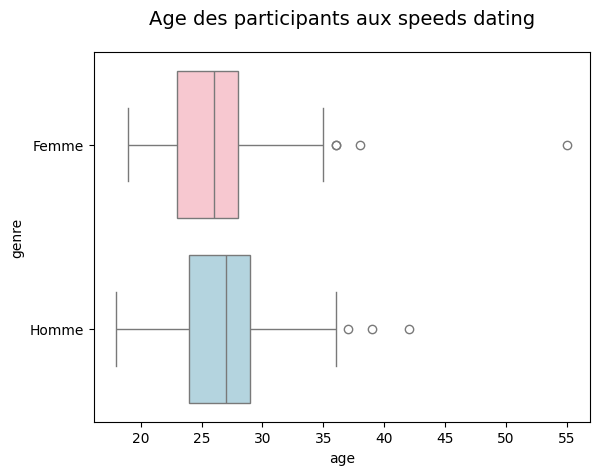

In [280]:
# boxplot de l'age en fonction du genre
sns.boxplot(df_unique, x="age", y = 'genre', hue='genre', palette=["pink", "lightblue"])
plt.title("Age des participants aux speeds dating", fontsize = 14, pad=20)
# display du boxplot
plt.show()

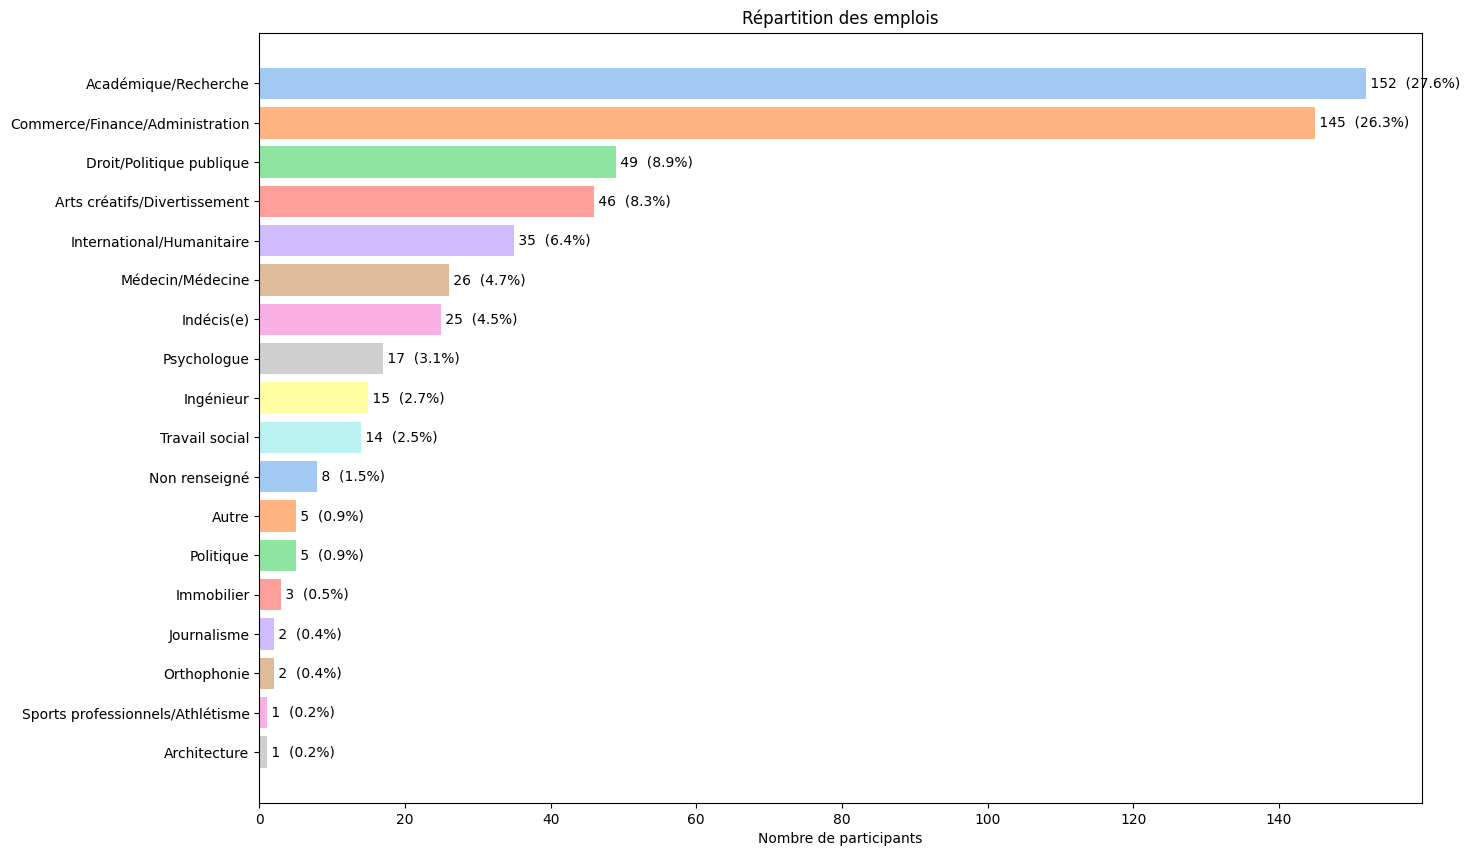

In [283]:
data_emploi = df_unique['emploi'].value_counts()

# Calcul du total pour les pourcentages
total = data_emploi.sum()


plt.figure(figsize=(15, 10))

palette = sns.color_palette("pastel", len(data_emploi.index)) 
plt.barh(data_emploi.index, data_emploi.values, color=palette)

plt.gca().invert_yaxis()


for index, value in enumerate(data_emploi.values):
    percent = (value / total) * 100
    label = f"{value}  ({percent:.1f}%)"
    plt.text(x=value, y=index, s=f" {label}", va='center', fontsize=10, color='black')

plt.title("Répartition des emplois")
plt.xlabel("Nombre de participants")


plt.show()

**Conclusion sur l'échantillon analysé:**

La population analysée s'élève à 551 participants.

La parité Hommes / Femmes est respectée.

Les âges des participants sont dans la même tranche (moins de 30 ans) mis à part 3 exceptions chez les hommes et 3 chez les femmes (non significatifs)

Les métiers représentés sont principalement dans le domaine tertiaire ce qui est probablement lié à la localisation des speed datings

## 4. Analyse des données

## Axe d'analyse n°1: est ce que la notation des attributs chez le partenaire évolue au fil du temps?

In [ ]:
df2=df

# création d'un dataframe "propre" pour analyse ultérieure

retrait des vagues 6 à 9 pour lesquelles la notation des attributs recherchés est différente

In [ ]:
df_attribute = df[~df['wave'].isin([6,7,8,9])]  

df_attribute.head()

In [ ]:
df_attribute['wave'].unique()

In [ ]:
# constitution de 4 dataframes correspondants à la notation des attributs recherchés chez les partenaires, suppression des lignes vides

# avant le Speed dating

df_attr_1 = df_attribute.iloc[:,[195,69,70,71,72,73,74]]
df_attr_1 = df_attr_1.dropna()

# Pendant le speed dating

df_attr_2 = df_attribute.iloc[:,[195,108,109,110,111,112,113]]
df_attr_2 = df_attr_2.dropna()


# le lendemain du speed dating

df_attr_3 = df_attribute.iloc[:,[195,128,129,130,131,132,133]]
df_attr_3 = df_attr_3.dropna()


# 3/4 semaines aprés le speed dating

df_attr_4 = df_attribute.iloc[:,[195,161,162,163,164,165,166]]
df_attr_4 = df_attr_4.dropna()


#renommage des colonnes
df_attr_1 = df_attr_1.rename(columns= {'attr1_1': 'Attractive',
            'sinc1_1':'Sincere',
            'intel1_1' : 'Intelligent',
            'fun1_1' : 'Funny',
            'amb1_1' : 'Ambitious',
            'shar1_1' : 'shares hobbies'})

df_attr_2 = df_attr_2.rename(columns= {'attr1_s': 'Attractive',
            'sinc1_s':'Sincere',
            'intel1_s' : 'Intelligent',
            'fun1_s' : 'Funny',
            'amb1_s' : 'Ambitious',
            'shar1_s' : 'shares hobbies'})

df_attr_3 = df_attr_3.rename(columns= {'attr1_2': 'Attractive',
            'sinc1_2':'Sincere',
            'intel1_2' : 'Intelligent',
            'fun1_2' : 'Funny',
            'amb1_2' : 'Ambitious',
            'shar1_2' : 'shares hobbies'})

df_attr_4 = df_attr_4.rename(columns= {'attr1_3': 'Attractive',
            'sinc1_3':'Sincere',
            'intel1_3' : 'Intelligent',
            'fun1_3' : 'Funny',
            'amb1_3' : 'Ambitious',
            'shar1_3' : 'shares hobbies'})



print("---------------------------------Avant le Speed dating---------------------------------------------")
display(df_attr_1.describe(include='all'))
print(f"--------------------------------Pendant le speed dating--------------------------------------------")
display(df_attr_2.describe(include='all'))
print('---------------------------------Le lendemain du speed dating----------------------------------------')
display(df_attr_3.describe(include='all'))
print('----------------------------------3/4 semaines aprés le speed dating---------------------------------')
display(df_attr_4.describe(include='all'))

In [ ]:
# Liste des 4 DataFrames
dataframes = [df_attr_1, df_attr_2, df_attr_3, df_attr_4]
titres = ["Moyenne des notations par attribut - avant le speed dating", "Moyenne des notations par attribut - pendant le speed dating", "Moyenne des notations par attribut - au lendemain du speed dating", "Moyenne des notations par attribut - 3/4 semaines aprés le speed dating"]  # Titres pour chaque sous-graphique
colonnes = ['Attractive', 'Sincere', 'Intelligent', 'Funny', 'Ambitious', 'shares hobbies']


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))


for i, (df_attr, titre) in enumerate(zip(dataframes, titres)):
    moyennes = df_attr[colonnes].mean()
    order = moyennes.sort_values(ascending = False).index 

    ax = axes[i // 2, i % 2]

    bars = sns.barplot(x=moyennes.index, y=moyennes.values, hue = moyennes.index,order = order , ax=ax,  legend = 0,  palette="pastel" )
    ax.set_title(titre)
    ax.set_xlabel("Variables")
    ax.set_ylabel("Moyenne")
    ax.set_ylim(0, 30)  
    ax.tick_params(axis='x', rotation=45) 

    for bar, valeur in zip(bars.patches, moyennes.values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.,  
                height + 0.5,  
                f"{valeur:.2f}",  
                ha='center',  
                va='bottom',  
                fontsize=9)


plt.tight_layout()


plt.show()

Subdivision hommes/femmes

In [ ]:


df_attr_1_hom = df_attr_1[df_attr_1['genre']== 'Homme']
df_attr_1_fem = df_attr_1[df_attr_1['genre']== 'Femme']

df_attr_2_hom = df_attr_2[df_attr_2['genre']== 'Homme']
df_attr_2_fem = df_attr_2[df_attr_2['genre']== 'Femme']

df_attr_3_hom = df_attr_3[df_attr_3['genre']== 'Homme']
df_attr_3_fem = df_attr_3[df_attr_3['genre']== 'Femme']

df_attr_4_hom = df_attr_4[df_attr_4['genre']== 'Homme']
df_attr_4_fem = df_attr_4[df_attr_4['genre']== 'Femme']

In [ ]:
# Liste des 8 DataFrames
dataframes = [df_attr_1_hom,df_attr_1_fem, df_attr_2_hom,df_attr_2_fem, df_attr_3_hom, df_attr_3_fem, df_attr_4_hom, df_attr_4_fem]
titres = ["Moyenne des notations par attribut - avant le speed dating - Hommes",
        "Moyenne des notations par attribut - avant le speed dating - Femmes", 
        "Moyenne des notations par attribut - pendant le speed dating - Hommes",
        "Moyenne des notations par attribut - pendant le speed dating - Femmes",
         "Moyenne des notations par attribut - au lendemain du speed dating - Hommes",
         "Moyenne des notations par attribut - au lendemain du speed dating - Femmes", 
         "Moyenne des notations par attribut - 3/4 semaines aprés le speed dating - Hommes",
         "Moyenne des notations par attribut - 3/4 semaines aprés le speed dating - Femmes"]  

colonnes = ['Attractive', 'Sincere', 'Intelligent', 'Funny', 'Ambitious', 'shares hobbies']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 11))

for i, (df_attr, titre) in enumerate(zip(dataframes, titres)):
    moyennes = df_attr[colonnes].mean()
    order = moyennes.sort_values(ascending = False).index 

    ax = axes[i // 2, i % 2]

    bars = sns.barplot(x=moyennes.index, 
    y=moyennes.values, 
    hue = moyennes.index,
    order = order , 
    width=0.5, 
    ax=ax,  
    legend = 0,  
    palette="pastel")
    

    ax.set_title(titre, fontsize = 12)
    ax.set_xlabel(" ")
    ax.set_ylabel("Moyenne")
    ax.set_ylim(0, 40)  
    ax.tick_params(axis='x', rotation=45,labelsize =8)  
    

    for bar, valeur in zip(bars.patches, moyennes.values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.,  
                height + 0.5,  
                f"{valeur:.2f}",  
                ha='center',  
                va='bottom', 
                fontsize=8)



plt.tight_layout()
plt.suptitle("test homme               femme")
plt.show()

In [ ]:
# Liste des colonnes (critères)
colonnes = ['Beauté', 'Sincérité', 'Intelligence', 'Humour', 'Ambition', 'Intérets communs']

# Séparation par genre et suppression de la colonne 'genre'
df_attr_1_hom = df_attr_1[df_attr_1['genre'] == 'Homme'].drop(columns=['genre'])
df_attr_1_fem = df_attr_1[df_attr_1['genre'] == 'Femme'].drop(columns=['genre'])

df_attr_2_hom = df_attr_2[df_attr_2['genre'] == 'Homme'].drop(columns=['genre'])
df_attr_2_fem = df_attr_2[df_attr_2['genre'] == 'Femme'].drop(columns=['genre'])

df_attr_3_hom = df_attr_3[df_attr_3['genre'] == 'Homme'].drop(columns=['genre'])
df_attr_3_fem = df_attr_3[df_attr_3['genre'] == 'Femme'].drop(columns=['genre'])

df_attr_4_hom = df_attr_4[df_attr_4['genre'] == 'Homme'].drop(columns=['genre'])
df_attr_4_fem = df_attr_4[df_attr_4['genre'] == 'Femme'].drop(columns=['genre'])

# Renommer les colonnes pour plus de clarté
for df in [df_attr_1_hom, df_attr_1_fem, df_attr_2_hom, df_attr_2_fem,
           df_attr_3_hom, df_attr_3_fem, df_attr_4_hom, df_attr_4_fem]:
    df.columns = colonnes


In [ ]:
display(df_attr_4_fem.head())

In [ ]:
# Liste des temporalités
temporalites = ["Avant", "Pendant", "Lendemain", "3/4 semaines après"]

# DataFrames pour les moyennes
moyennes_hommes = pd.DataFrame(index=colonnes, columns=temporalites)
moyennes_femmes = pd.DataFrame(index=colonnes, columns=temporalites)

# Remplir les moyennes pour les hommes
moyennes_hommes["Avant"] = df_attr_1_hom.mean()
moyennes_hommes["Pendant"] = df_attr_2_hom.mean()
moyennes_hommes["Lendemain"] = df_attr_3_hom.mean()
moyennes_hommes["3/4 semaines après"] = df_attr_4_hom.mean()

# Remplir les moyennes pour les femmes
moyennes_femmes["Avant"] = df_attr_1_fem.mean()
moyennes_femmes["Pendant"] = df_attr_2_fem.mean()
moyennes_femmes["Lendemain"] = df_attr_3_fem.mean()
moyennes_femmes["3/4 semaines après"] = df_attr_4_fem.mean()


moyennes_femmes.head()

In [ ]:

def plot_grouped_bars(df, title, palette="pastel"):
    fig, ax = plt.subplots(figsize=(10, 7))
    bar_width = 0.15  
    x = np.arange(len(df.index))  

    for i, temporalite in enumerate(df.columns):
        ax.bar(x + i * bar_width, df[temporalite], width=bar_width, label=temporalite, color=sns.color_palette(palette)[i])

   
 #   for j, temporalite in enumerate(df.columns):
 #       for i, valeur in enumerate(df[temporalite]):
 #           ax.text(i + j * bar_width, valeur + 0.5, f"{int(round(valeur))}", ha='center', va='bottom', fontsize=9)  # Arrondi à l'entier

    ax.set_xticks(x + bar_width * 1.5)
    ax.set_xticklabels(df.index, rotation=45, ha='right', fontsize=10)
    #ax.set_ylabel("Moyenne", fontsize=12)
    ax.set_title(title, fontsize=16, pad=20)
    ax.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# Tracer pour les hommes
plot_grouped_bars(moyennes_hommes, "Moyenne des notations par critère — Hommes", palette="pastel")

# Tracer pour les femmes
plot_grouped_bars(moyennes_femmes, "Moyenne des notations par critère — Femmes", palette="pastel")


### ***Analyse des critères d’attractivité dans le temps***

Les notations des participants mettent en évidence des dynamiques différenciées selon le genre :

***Chez les hommes***

L’attractivité physique demeure le critère dominant à tous les moments de mesure.

Le lendemain de l’événement, le critère « drôle » progresse et devance l’intelligence, habituellement citée comme deuxième qualité recherchée.

Les écarts entre le critère principal et les autres attributs sont nettement marqués, traduisant une hiérarchie claire des préférences.

***Chez les femmes***

Avant le speed dating, l’intelligence est déclarée comme le principal facteur d’attractivité.

À partir du speed dating, l’attractivité physique devient le critère n°1 et le reste dans le temps.

Les différences entre attributs sont plus modérées que chez les hommes, suggérant des préférences plus équilibrées.

***➜ À retenir***

Le speed dating ne modifie pas les préférences exprimées par les hommes.

Il entraîne en revanche une évolution plus marquée des critères déclarés par les femmes, avec un recentrage sur l’attractivité physique après l’expérience.

## Axe d'analyse n°2: est ce que la façon dont les participants s'auto évaluent a une incidence sur le fait d'avoir un match?

In [ ]:
df2.head()

In [ ]:


# Remplacer les valeurs 1 et 0 par "Oui" et "Non"
data_match = df2['match'].value_counts()
labels = ['Non' if index == 0 else 'Oui' for index in data_match.index]

# Couleurs personnalisées
colors = ['#FFC0CB', '#7FFFD4']

plt.figure()
plt.pie(
    data_match.values,
    labels=labels,  # Utiliser les libellés "Oui"/"Non"
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    radius=1
)

plt.title("Répartition des matchs", fontsize=14, pad=30)
plt.show()


In [ ]:
df_match=df2[df2['match']==1]
df_no_match=df2[df2['match']==0]


In [ ]:
df_eval = df2.loc[:,['genre','match', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2']]
df_eval.head()
len(df_eval)


In [ ]:
#Auto evaluation avant le Speed dating

df_eval_1 = df2.loc[:,['genre','match', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1']]
df_eval_1 = df_eval_1.dropna()


# Auto evaluation le lendemain du speed dating

df_eval_3 = df2.loc[:,['genre','match', 'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2']]
df_eval_3 = df_eval_3.dropna()



#renommage des colonnes
df_eval_1  = df_eval_1 .rename(columns= {'attr3_1': 'Beauté',
            'sinc3_1':'Sincérité',
            'intel3_1' : 'Intelligence',
            'fun3_1' : 'Humour',
            'amb3_1' : 'Ambition'})

df_eval_3 = df_eval_3.rename(columns= {'attr3_2': 'Beauté',
            'sinc3_2':'Sincérité',
            'intel3_2' : 'Intelligence',
            'fun3_2' : 'Humour',
            'amb3_2' : 'Ambition'})

# subdivision match / no match 

df_eval_1_match = df_eval_1[df_eval_1['match']==1]
df_eval_1_no_match = df_eval_1[df_eval_1['match']==0]
df_eval_3_match = df_eval_3[df_eval_3['match']==1]
df_eval_3_no_match = df_eval_3[df_eval_3['match']==0]

# subdivision Hommes / femmes

df_eval_1_match_Homme = df_eval_1_match[df_eval_1_match['genre']=='Homme']
df_eval_1_match_Femme = df_eval_1_match[df_eval_1_match['genre']=='Femme']
df_eval_1_no_match_Homme = df_eval_1_no_match[df_eval_1['genre']== 'Homme']
df_eval_1_no_match_Femme = df_eval_1_no_match[df_eval_1['genre']== 'Femme']
df_eval_3_match_Homme = df_eval_3_match[df_eval_3_match['genre']=='Homme']
df_eval_3_match_Femme = df_eval_3_match[df_eval_3_match['genre']=='Femme']
df_eval_3_no_match_Homme = df_eval_3_no_match[df_eval_3['genre']== 'Homme']
df_eval_3_no_match_Femme = df_eval_3_no_match[df_eval_3['genre']== 'Femme']




In [ ]:

dataframes = [df_eval_1_match, df_eval_3_match, df_eval_1_no_match, df_eval_3_no_match]
titres = ["Auto éval avant le SD - personne ayant eu 1 match", "Auto éval au lendemain du SD - personne ayant eu 1 match", "Auto éval avant le SD - personne sans match", "Auto éval au lendemain du SD - personne sans match"]  # Titres pour chaque sous-graphique
colonnes = ['Beauté', 'Sincérité', 'Intelligence', 'Humour', 'Ambition']


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))


for i, (df_attr, titre) in enumerate(zip(dataframes, titres)):
    moyennes = df_attr[colonnes].mean()
    order = moyennes.sort_values(ascending = False).index 

   
    ax = axes[i // 2, i % 2]

   
    bars = sns.barplot(x=moyennes.index, y=moyennes.values, hue = moyennes.index,order = order , ax=ax,  legend = 0,  palette="pastel" )
    ax.set_title(titre)
    ax.set_xlabel("Variables")
    ax.set_ylabel("Moyenne")
    ax.set_ylim(0, 12)  
    ax.tick_params(axis='x', rotation=45)  

   
    for bar, valeur in zip(bars.patches, moyennes.values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.,  
                height + 0.5,  
                f"{valeur:.2f}",  
                ha='center',  
                va='bottom',  
                fontsize=9)


plt.tight_layout()

plt.show()

In [ ]:

dataframes = [df_eval_1_match_Homme,df_eval_1_no_match_Homme,df_eval_3_match_Homme,df_eval_3_no_match_Homme,df_eval_1_match_Femme,df_eval_1_no_match_Femme,df_eval_3_match_Femme,df_eval_3_no_match_Femme]
titres = ["Auto éval avant le SD - Homme ayant eu 1 match", "Auto éval au lendemain du SD - Homme ayant eu 1 match", "Auto éval avant le SD - Homme sans match", "Auto éval au lendemain du SD - Homme sans match","Auto éval avant le SD - Femme ayant eu 1 match", "Auto éval au lendemain du SD - Femme ayant eu 1 match", "Auto éval avant le SD - Femme sans match", "Auto éval au lendemain du SD - Femme sans match"]  

colonnes = ['Beauté', 'Sincérité', 'Intelligence', 'Humour', 'Ambition']



fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 10))


for i, (df_attr, titre) in enumerate(zip(dataframes, titres)):
    moyennes = df_attr[colonnes].mean()
    order = moyennes.sort_values(ascending = False).index 

   
    ax = axes[i // 2, i % 2]

   
    bars = sns.barplot(x=moyennes.index, y=moyennes.values, hue = moyennes.index,order = order , ax=ax,  legend = 0,  palette="pastel" )
    ax.set_title(titre)
    ax.set_xlabel(" ")
    ax.set_ylabel("Moyenne")
    ax.set_ylim(0, 12)  
    ax.tick_params(axis='x', rotation=45)  

   
    for bar, valeur in zip(bars.patches, moyennes.values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.,  
                height + 0.5,  
                f"{valeur:.2f}",  
                ha='center',  
                va='bottom',  
                fontsize=9)


plt.tight_layout()

plt.show()

In [ ]:


# Liste des critères
criteres =  ['Beauté', 'Sincérité', 'Intelligence', 'Humour', 'Ambition']

# DataFrame pour les moyennes (hommes)
moyennes_hommes2 = pd.DataFrame(index=criteres)
moyennes_hommes2["Avant_Match"] = df_eval_1_match_Homme[criteres].mean()
moyennes_hommes2["Après_Match"] = df_eval_3_match_Homme[criteres].mean()
moyennes_hommes2["Avant_NoMatch"] = df_eval_1_no_match_Homme[criteres].mean()
moyennes_hommes2["Après_NoMatch"] = df_eval_3_no_match_Homme[criteres].mean()

# DataFrame pour les moyennes (femmes)
moyennes_femmes2 = pd.DataFrame(index=criteres)
moyennes_femmes2["Avant_Match"] = df_eval_1_match_Femme[criteres].mean()
moyennes_femmes2["Après_Match"] = df_eval_3_match_Femme[criteres].mean()
moyennes_femmes2["Avant_NoMatch"] = df_eval_1_no_match_Femme[criteres].mean()
moyennes_femmes2["Après_NoMatch"] = df_eval_3_no_match_Femme[criteres].mean()

moyennes_femmes2.head()

In [ ]:


def plot_grouped_bars(df, title):
    fig, ax = plt.subplots(figsize=(12, 6))
    bar_width = 0.15
    x = np.arange(len(df.index))

    # Définir les couleurs : 2 tons de vert pour les "Match", 2 tons de rose pour les "No Match"
    couleurs = {
        "Avant_Match": "#7FFFD4",  # Vert clair
        "Après_Match": "#33B39B",  # Vert foncé
        "Avant_NoMatch": "#FFC0CB",  # Rose clair
        "Après_NoMatch": "#DB7093"   # Rose foncé
    }

    for i, col in enumerate(df.columns):
        ax.bar(x + i * bar_width, df[col], width=bar_width, label=col, color=couleurs[col])

    # Ajouter les valeurs au-dessus des barres (avec 2 décimales)
#    for i, col in enumerate(df.columns):
#        for j, valeur in enumerate(df.loc[:, col]):
#            ax.text(j + i * bar_width, valeur + 0.3, f"{valeur:.2f}", ha='center', va='bottom', fontsize=9)

    ax.set_xticks(x + bar_width * 1.5)
    ax.set_xticklabels(df.index, rotation=45, ha='right', fontsize=10)
    #ax.set_ylabel("Moyenne", fontsize=12)
    ax.set_title(title, fontsize=16, pad=20)
    ax.set_ylim(0, 9)  # Axe des ordonnées jusqu'à 9
    ax.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Tracer pour les hommes
plot_grouped_bars(moyennes_hommes2, "Auto-évaluation moyenne — Hommes")

# Tracer pour les femmes
plot_grouped_bars(moyennes_femmes2, "Auto-évaluation moyenne — Femmes")


In [ ]:
# corrélation entre auto évaluation et match (sur la base de l'auto évaluation faite avant le speed dating)

df_eval_1_hom = df_eval_1[df_eval_1["genre"]== 'Homme' ]
df_eval_1_hom = df_eval_1_hom.drop(columns=['genre'])

df_eval_1_fem = df_eval_1[df_eval_1["genre"]== 'Femme']
df_eval_1_fem = df_eval_1_fem.drop(columns=['genre'])

# Construire la matrice de corrélation
corr_matrix_hom = df_eval_1_hom.corr()
corr_matrix_fem = df_eval_1_fem.corr()

print("corrélation entre auto évaluation et match - Hommes")
print('-------------------------------------------------------------------------------------------------------------')
print(corr_matrix_hom)
print('-------------------------------------------------------------------------------------------------------------')

plt.figure(figsize=(12, 10))  
sns.heatmap(corr_matrix_hom, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matrice de corrélation_homme")
plt.show()
print('-------------------------------------------------------------------------------------------------------------')
print('-------------------------------------------------------------------------------------------------------------')
print("corrélation entre auto évaluation et match - Femmes")
print('-------------------------------------------------------------------------------------------------------------')
print(corr_matrix_fem)
print('-------------------------------------------------------------------------------------------------------------')

plt.figure(figsize=(12,10))  
sns.heatmap(corr_matrix_fem, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matrice de corrélation_Femme")
plt.show()


## ***Impact de l’auto-évaluation sur l’obtention d’un match***

L’analyse montre que l’auto-évaluation des participants évolue peu selon qu’ils obtiennent un match ou non.

***Chez les hommes***

L’auto-évaluation après le speed dating est légèrement inférieure à celle mesurée avant l’événement
(–0,06 point sur l’attribut principal, indépendamment de l’obtention d’un match).

***Chez les femmes***

En cas de match, l’auto-évaluation du meilleur attribut progresse légèrement (+0,06 point).

En l’absence de match, elle diminue marginalement (–0,02 point).

***Globalement***

Les écarts d’auto-évaluation entre participants ayant obtenu un match et ceux n’en ayant pas obtenu sont faibles et non significatifs.

***➜ À retenir***

La manière dont les participants s’auto-évaluent n’a pas d’impact notable sur la probabilité d’obtenir un match.

## Axe d'analyse n°3: Est ce que les speed-datings à thèmes conduisent à plus de matchs entre les participants?

Lors des vagues 18,19,20 et 21, les participants ont apporté un livre ou un magazine, marquant un intéret marqué dans le thème de la lecture. 

Il est intéressant de vérifier si les taux de matchs sont plus significatifs dans ces cas?

In [ ]:
df_interest = df[df['wave'].isin([18,19,20,21])]  

df_interest.head()

In [ ]:
#Rappel : part des match sur la totalité des rencontres


data_match = df2['match'].value_counts()
labels = ['Non' if index == 0 else 'Oui' for index in data_match.index]

# Couleurs personnalisées
colors = ['#FFC0CB', '#7FFFD4']

plt.figure()
plt.pie(
    data_match.values,
    labels=labels,  
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    radius=1
)

plt.title("Répartition des matchs sur la totalité des rencontres", fontsize=14, pad=30)
plt.show()


In [ ]:
# Répartition des matchs suite aux speed-datings "à thèmes"

data_interest_match = df_interest['match'].value_counts()
colors =['#FFC0CB', '#7FFFD4']
labels = ['Non' if index == 0 else 'Oui' for index in data_match.index]

plt.figure()
plt.pie(data_interest_match.values, 
        labels=labels,  
        colors=colors,
       autopct='%1.1f%%',
       shadow=True, 
       startangle=90,
       radius=1
       )
#plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Répartition des matchs - Speed-datings à thèmes", fontsize = 14, pad=30)    
                                                                                    
plt.show()

**Impact des speed-datings à thèmes sur les matchs:**

L’analyse des données montre que les rencontres avec un thème commun (ex : participants arrivant avec un livre ou un magazine) ne génèrent pas un taux de matchs plus élevé que les sessions classiques.

**→ À retenir**
Un intérêt commun (ex : lecture) ne semble pas augmenter significativement les chances de match entre les participants.

**Note méthodologique**
Ces résultats sont à considérer sous réserve d’un échantillon réduit. Une analyse sur un plus grand volume de données serait nécessaire pour confirmer cette tendance


## Axe d'analyse n°4: Est ce que l'objectif principal incitant les participants à participer au speed-dating a une incidence sur le taux de match?

In [ ]:
df_goal = df2.dropna(subset=['goal'])

In [ ]:
map_goal = {
    1: 'Pour passer une soirée amusante',
    2: 'Pour rencontrer de nouvelles personnes',
    3: 'Pour obtenir un rendez-vous',
    4: 'Pour trouver une relation sérieuse',
    5: 'Pour dire que je l’ai fait',
    6: 'Autre'
}

df_goal["objectif"] = df_goal['goal'].map(map_goal)

df_goal_1 = df_goal[df_goal['goal']==1]
df_goal_2 = df_goal[df_goal['goal']==2]
df_goal_3 = df_goal[df_goal['goal']==3]
df_goal_4 = df_goal[df_goal['goal']==4]
df_goal_5 = df_goal[df_goal['goal']==5]
df_goal_6 = df_goal[df_goal['goal']==6]


In [ ]:
data_goal_1_match = df_goal_1['match'].value_counts()
data_goal_2_match = df_goal_2['match'].value_counts()
data_goal_3_match = df_goal_3['match'].value_counts()
data_goal_4_match = df_goal_4['match'].value_counts()
data_goal_5_match = df_goal_5['match'].value_counts()
data_goal_6_match = df_goal_6['match'].value_counts()

In [ ]:

dataframes = [data_goal_1_match,data_goal_2_match,data_goal_3_match,data_goal_4_match,data_goal_5_match,data_goal_6_match]
titres = ['Pour passer une soirée amusante',
    'Pour rencontrer de nouvelles personnes',
    'Pour obtenir un rendez-vous',
    'Pour trouver une relation sérieuse',
    'Pour dire que je l’ai fait',
    'Autre'
]  
colors =['#FFC0CB', '#7FFFD4']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 11))

fig.suptitle("Répartition des matches par objectif de speed dating", fontsize=16, y=1.02)

# Boucle pour créer un pie chart par objectif
for i, (ax, titre, data) in enumerate(zip(axes.flatten(), titres, dataframes)):
   
    sizes = data.values

    # Créer le pie chart
    ax.pie(sizes, labels=['Non', 'oui'], colors=colors, autopct='%1.1f%%', startangle=90)
    ax.set_title(titre, fontsize=12)

# Ajuster l'espacement et afficher
plt.tight_layout()
plt.show()

## impact de l'objectif principal sur le taux de match?

Les taux de matchs sont relativement semblables d'un objectif à l'autre, seul l'objectif "autre" conduit à un taux en dessous de 15%

**→ À retenir**

L'objectif avec lequel les participants assistent à un speed dating n'a pas d'impact significatif sur le fait d'obtenir un match ou non

## Axe d'analyse n°5: Est ce que le fait d'avoir un match a une incidence sur le fait d'avoir un rendez vous?

In [ ]:
# repartition des matchs sur population totale

data_df_date = df2['date_3'].value_counts()
colors =['#FFC0CB', '#7FFFD4']
labels = ['Non' if index == 0 else 'Oui' for index in data_match.index]

plt.figure()
plt.pie(data_df_date.values, labels=labels,  
        colors=colors,
       autopct='%1.1f%%',
       shadow=True, 
       startangle=90,
       radius=1
       )
#plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Répartition personnes ayant eu 1 date (avec ou sans match préalable) ", fontsize = 14, pad=20)   

In [ ]:
#répartition des personnes ayant eu un rdv avec leur match (sur la population ayant eu un match)

data_date = df_match['date_3'].value_counts()
colors =[ '#7FFFD4','#FFC0CB']
labels = ['Non' if index == 0 else 'Oui' for index in data_match.index]

plt.figure()
plt.pie(data_date.values, labels=labels,  
        colors=colors,
       autopct='%1.1f%%',
       shadow=True, 
       startangle=90,
       radius=1
       )
#plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Répartition personnes ayant eu 1 date aprés leur match", fontsize = 14, pad=30)   
                                                                                    
plt.show()

In [ ]:
#répartition des personnes ayant eu un rdv sans avoir eu de match (sur la population n'ayant pas eu match)

data_date_nomatch = df_no_match['date_3'].value_counts()
colors =['#FFC0CB', '#7FFFD4']
labels = ['Non' if index == 0 else 'Oui' for index in data_match.index]

plt.figure()
plt.pie(data_date_nomatch.values, labels=labels,  
        colors=colors,
       autopct='%1.1f%%',
       shadow=True, 
       startangle=90,
       radius=1
       )
#plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Répartition personnes ayant eu 1 date sans avoir eu de match", fontsize = 14, pad=15)   
                                                                                    
plt.show()

## Impact d'un match sur le fait d'avoir un rendez vous?

**16,5% des participants (soit 8,25 % des rencontres)** ont obtenu un match.

Parmi eux, 51,1% ont eu un premier rendez-vous.
Parmi ceux sans match, 34,8% ont tout de même eu un rendez-vous.

**→ Constat**
Bien qu’un match doive théoriquement favoriser les rendez-vous, l’écart observé (51,1 % vs 34,8 %) reste moins marqué qu’attendu.

**→ Questionnement**
Incohérence possible : Les participants sans match ne devraient pas pouvoir se rencontrer ultérieurement.
Hypothèse alternative : Possibilité de "matchs a posteriori" non documentés.

**→ À retenir**
L’impact d’un match sur l’obtention d’un rendez-vous est moins net que prévu, soulignant un doute sur la qualité ou la cohérence des données.


## 5. Conclusion & recommendations

**Facteurs influençant l’obtention d’un premier rendez-vous**

**→ Conclusion**
Les axes analysés ne permettent pas d’identifier les facteurs influençant la décision d’un premier rendez-vous après un speed-dating.

**Limites de l’analyse et recommandations**

**Objectif initial:**
Aider Tinder à identifier les facteurs clés de succès pour qu’un match sur leur application aboutisse à un premier rendez-vous, voire à une relation durable. L’objectif était de construire un modèle prédictif mettant en avant les profils les plus susceptibles de plaire aux utilisateurs.

**Limites identifiées**

**Données insuffisantes :**

Volumétrie faible (551 participants seulement).
Données obsolètes : Non représentatives des dynamiques actuelles de l’application.

**Contexte inadapté :**

Les speed-datings impliquent des rencontres physiques, ce qui introduit des critères inconscients (ex: chimie, langage non verbal) non reproductibles dans un environnement digital comme Tinder.

**Incohérences dans les données :**

Certains participants ont eu un rendez-vous sans match préalable, ce qui remet en question la fiabilité des données.

**→ Recommandations pour Tinder**

    - Utiliser des données plus récentes pour refléter les tendances actuelles.
    - Augmenter la volumétrie des participants pour obtenir des résultats statistiquement significatifs.
    - Reproduire les conditions réelles d’utilisation de l’application (ex: études basées sur des interactions digitales plutôt que des rencontres physiques).
    - Mener des enquêtes qualitatives auprès des utilisateurs pour identifier :

        - Les critères recherchés chez un partenaire.
        - Les éléments rédhibitoires qui empêchent une rencontre après un match.

